<a href="https://colab.research.google.com/github/smnststn/JP_weather_data/blob/main/Visualization_Japanese_weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This mini-project is a data visualization practice exercise using weather forecasts from the Japan Meteorological Agency. My primary goal is to explore handling Japanese text within data and create bilingual visualizations that are accessible to both Japanese and non-Japanese speakers. We will explore temperature, wind, and weather patterns, using simple techniques to clean and preprocess the data, aiming for clarity and visual appeal.

Source: https://www.kaggle.com/datasets/oinuma/japan-meteorological-agency-forecast

In [94]:
# loading, preprocessing & analysis of data
import numpy as np
import pandas as pd
import kagglehub
import os

# import for Japanese characters
!pip install japanize_matplotlib
import japanize_matplotlib

# imputation of missing data
from sklearn.impute import KNNImputer

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
path = kagglehub.dataset_download("oinuma/japan-meteorological-agency-forecast")

files = os.listdir(path)

In [96]:
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = file
        break  # Stop searching once found

In [97]:
csv_path = os.path.join(path, csv_file)
data = pd.read_csv(csv_path)

Let's first explore the dataset, which was originally available on Kaggle. Examining its structure will help us understand the types of data we're working with. By displaying the first few rows, we can get an overview of the features, column names, and its content.

In [98]:
data

,publishingOffice,reportDatetime,timeDefine,areaName,areaCode,weatherCode,weather,wind,wave,pop,temp,tempMin,tempMax,tempMinUpper,tempMaxUpper,tempMinLower,tempMaxLower,reliability
0,石垣島地方気象台,2023-05-31T17:00:00+09:00,2023-05-31T17:00:00+09:00,石垣島地方,474010,300.0,雨 所により 雷 を伴う,北東の風 非常に強く,８メートル うねり を伴う,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,石垣島地方気象台,2023-05-31T17:00:00+09:00,2023-06-01T00:00:00+09:00,石垣島地方,474010,308.0,雨 夜 くもり 所により 昼前 まで 雷を伴い 激しく 降る,北の風 非常に強く 後 北西の風 非常に強く,９メートル 後 ７メートル うねり を伴う,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,石垣島地方気象台,2023-05-31T17:00:00+09:00,2023-06-02T00:00:00+09:00,石垣島地方,474010,200.0,くもり,北西の風 非常に強く 後 西の風 強く,７メートル 後 ５メートル うねり を伴う,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,石垣島地方気象台,2023-05-31T17:00:00+09:00,2023-05-31T17:00:00+09:00,与那国島地方,474020,300.0,雨 所により 雷 を伴う,北の風 強く,６メートル うねり を伴う,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,石垣島地方気象台,2023-05-31T17:00:00+09:00,2023-06-01T00:00:00+09:00,与那国島地方,474020,300.0,雨 夜 くもり 所により 夕方 まで 雷 を伴う,北の風 非常に強く 後 北西の風 非常に強く,７メートル 後 ５メートル うねり を伴う,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,石垣島地方気象台,2023-04-30T17:00:00+09:00,2023-05-03T00:00:00+09:00,石垣島,94081,NaN,NaN,NaN,NaN,NaN,NaN,24.0,29.0,26.0,30.0,23.0,27.0,NaN
3530,石垣島地方気象台,2023-04-30T17:00:00+09:00,2023-05-04T00:00:00+09:00,石垣島,94081,NaN,NaN,NaN,NaN,NaN,NaN,25.0,30.0,27.0,31.0,24.0,27.0,NaN
3531,石垣島地方気象台,2023-04-30T17:00:00+09:00,2023-05-05T00:00:00+09:00,石垣島,94081,NaN,NaN,NaN,NaN,NaN,NaN,25.0,30.0,27.0,31.0,24.0,28.0,NaN
3532,石垣島地方気象台,2023-04-30T17:00:00+09:00,2023-05-06T00:00:00+09:00,石垣島,94081,NaN,NaN,NaN,NaN,NaN,NaN,25.0,30.0,27.0,31.0,24.0,28.0,NaN


I'll start by omitting the following columns for now. As we progress, we'll trim the dataset even further, keeping only the parts that are most useful for our exploratory visualization experiment.

In [99]:
# removing irrelevant columns
data = data.drop(columns=['publishingOffice', 'timeDefine', 'areaCode', 'reliability'])

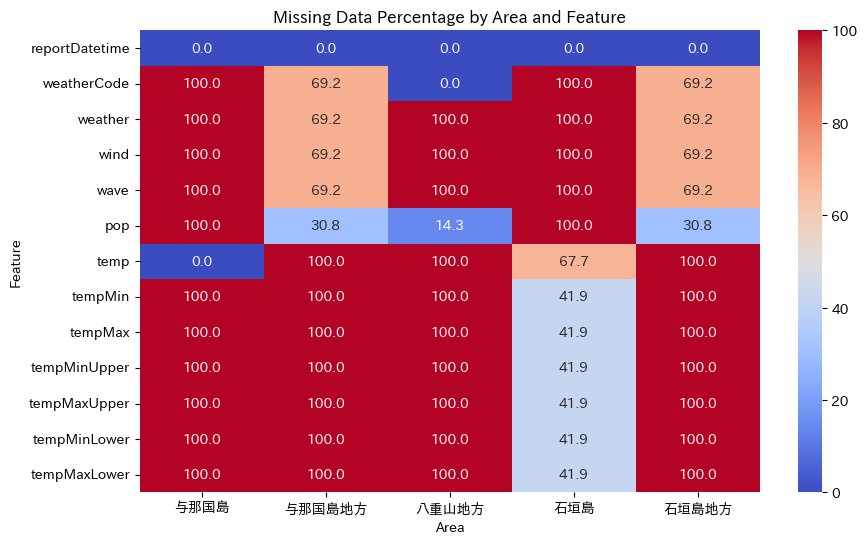

In [100]:
# grouping by areaName and show the percentage of missing values per each location
missing_percentage = data.groupby('areaName').apply(lambda x: x.isnull().sum() / len(x) * 100, include_groups=False)

# heatmap of missing percentages
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(missing_percentage.T, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Missing Data Percentage by Area and Feature")
plt.xlabel("Area")
plt.ylabel("Feature")
plt.show()

The dataset provides weather-related information, including temperature, wind, and wave data. By categorizing the data based on location, we can identify which data points are missing for each area. Given that a significant portion of the data is incomplete, this overview will help us determine which visualizations are feasible for our practice.

The romanized name of locations:

* 与那国島 - Yonagunijima
* 与那国島地方 - Yonagunijima chihō
* 八重山地方 - Yaeyama chihō
* 石垣島 - Ishigakijima
* 石垣島地方 - Ishigakijima chihō


In [101]:
data.describe()

,weatherCode,pop,temp,tempMin,tempMax,tempMinUpper,tempMaxUpper,tempMinLower,tempMaxLower
count,1147.000000,1674.000000,620.000000,558.000000,558.000000,558.00000,558.000000,558.000000,558.000000
mean,192.433304,28.070490,26.564516,23.483871,28.288530,25.06810,30.005376,21.783154,26.758065
std,44.154295,19.636075,2.576901,1.655932,1.409475,1.53675,1.159601,1.671797,1.377127
min,100.000000,0.000000,20.000000,19.000000,25.000000,21.00000,26.000000,18.000000,23.000000
25%,200.000000,10.000000,25.000000,22.000000,27.000000,24.00000,29.000000,21.000000,26.000000
50%,201.000000,20.000000,27.000000,24.000000,29.000000,25.00000,30.000000,22.000000,27.000000
75%,202.000000,40.000000,29.000000,25.000000,29.000000,26.00000,31.000000,23.000000,28.000000
max,313.000000,90.000000,31.000000,27.000000,31.000000,28.00000,33.000000,25.000000,29.000000


# Visualization of wind data

In this section, I will play around with visualization of wind, which is available only for two locations.

In [102]:
# filtering out areaNames where we have at least some data of feature 'wind'
wind_areas = missing_percentage[missing_percentage['wind'] != 100].index

# preparing a new DataFrame used further in this section
wind_df = pd.DataFrame({'areaName': data[data['areaName'].isin(wind_areas)]['areaName'],
                        'reportDatetime': data[data['areaName'].isin(wind_areas)]['reportDatetime'],
                        'wind': data[data['areaName'].isin(wind_areas)]['wind'].astype(str)})

In [103]:
wind_df
# currently, the trimmed database looks as follows:

,areaName,reportDatetime,wind
0,石垣島地方,2023-05-31T17:00:00+09:00,北東の風 非常に強く
1,石垣島地方,2023-05-31T17:00:00+09:00,北の風 非常に強く 後 北西の風 非常に強く
2,石垣島地方,2023-05-31T17:00:00+09:00,北西の風 非常に強く 後 西の風 強く
3,与那国島地方,2023-05-31T17:00:00+09:00,北の風 強く
4,与那国島地方,2023-05-31T17:00:00+09:00,北の風 非常に強く 後 北西の風 非常に強く
...,...,...,...
3507,与那国島地方,2023-05-01T08:00:00+09:00,nan
3508,与那国島地方,2023-05-01T08:00:00+09:00,nan
3509,与那国島地方,2023-05-01T08:00:00+09:00,nan
3510,与那国島地方,2023-05-01T08:00:00+09:00,nan


In [104]:
# removing separator '\u3000'
wind_df['wind'] = wind_df['wind'].str.replace('\u3000', '')
wind_df

,areaName,reportDatetime,wind
0,石垣島地方,2023-05-31T17:00:00+09:00,北東の風非常に強く
1,石垣島地方,2023-05-31T17:00:00+09:00,北の風非常に強く後北西の風非常に強く
2,石垣島地方,2023-05-31T17:00:00+09:00,北西の風非常に強く後西の風強く
3,与那国島地方,2023-05-31T17:00:00+09:00,北の風強く
4,与那国島地方,2023-05-31T17:00:00+09:00,北の風非常に強く後北西の風非常に強く
...,...,...,...
3507,与那国島地方,2023-05-01T08:00:00+09:00,nan
3508,与那国島地方,2023-05-01T08:00:00+09:00,nan
3509,与那国島地方,2023-05-01T08:00:00+09:00,nan
3510,与那国島地方,2023-05-01T08:00:00+09:00,nan


For the information in column wind contains textual descriptions of wind conditions written in Japanese, likely originating from weather reports. It is formatted in a specific way - the descriptions includes direction and intensity. Some entries indicate changing conditions over time using "後" (after) as a separator, essentially providing multiple short-term wind data within the reported timeframe.

We will therefore use the following function to break down the text into following indicators:

* **wind direction**: indicated by cardinal or intercardinal directions like 北東 (North-East), 北 (North), 北西 (North-West), etc.
* **wind intensity**: described using qualitative terms like 非常に強く (very strong), 強く (strong), etc. As this information is ordinal, the function will encode the intensity type into numeric value.

The separator "after" (後) will indicate, whether the function should look for additional information, which will be returned as a list of direction and wind intensity indicators.

In [105]:
def split_wind (string):

  string_split = string.split('後')
  direction = []
  intensity = []

  directions = ['北東', '北西', '南東', '南西', '北', '東', '南','南西']
  encoding_intensity = {
      '非常に強く': 5,  # Very Strong
      'はじめやや強く': 2, # Initially Somewhat Strong
      'やや強く': 3,     # Somewhat Strong
      '強く': 4,        # Strong
      '': 1,             # Assuming this represents a neutral/calm state
      'nan': 1         # Assuming np.nan also represents a neutral/calm state
  }

  for num in range(len(string_split)):

    for direction_substring in directions:  # Iterate through direction substrings
      if direction_substring in string_split[num]:  # Check if substring is present
        direction.append(direction_substring)  # Append to direction list
        break

    for intensity_substring in encoding_intensity.keys():  # Iterate through intensity substrings
      if intensity_substring in string_split[num]:  # Check if substring is present
        intensity.append(encoding_intensity[intensity_substring])  # Append to direction list
        break

  return direction, intensity

Following code utilizes function above by inputting raw wind data in Japanese text format, extracts the key information (direction and intensity), and stores it in a more structured way within the DataFrame.

In [106]:
for index, row in wind_df.iterrows():
    direction, intensity = split_wind(row['wind'])

    for num in range(len(direction)):
        wind_df.loc[index, 'wind_' + str(num+1) + '_direction'] = direction[num]

    for num in range(len(intensity)):
        #numerical_intensity = encoding_wind_intensity.get(intensity[num], 1)
        wind_df.loc[index, 'wind_' + str(num+1) + '_intensity'] = intensity[num]

wind_df

,areaName,reportDatetime,wind,wind_1_direction,wind_1_intensity,wind_2_direction,wind_2_intensity
0,石垣島地方,2023-05-31T17:00:00+09:00,北東の風非常に強く,北東,5.0,NaN,NaN
1,石垣島地方,2023-05-31T17:00:00+09:00,北の風非常に強く後北西の風非常に強く,北,5.0,北西,5.0
2,石垣島地方,2023-05-31T17:00:00+09:00,北西の風非常に強く後西の風強く,北西,5.0,NaN,4.0
3,与那国島地方,2023-05-31T17:00:00+09:00,北の風強く,北,4.0,NaN,NaN
4,与那国島地方,2023-05-31T17:00:00+09:00,北の風非常に強く後北西の風非常に強く,北,5.0,北西,5.0
...,...,...,...,...,...,...,...
3507,与那国島地方,2023-05-01T08:00:00+09:00,nan,NaN,1.0,NaN,NaN
3508,与那国島地方,2023-05-01T08:00:00+09:00,nan,NaN,1.0,NaN,NaN
3509,与那国島地方,2023-05-01T08:00:00+09:00,nan,NaN,1.0,NaN,NaN
3510,与那国島地方,2023-05-01T08:00:00+09:00,nan,NaN,1.0,NaN,NaN


In [107]:
# replacing nan value
wind_df['wind_1_direction'] = wind_df['wind_1_direction'].apply(lambda x: '' if pd.isna(x) else x)
wind_df['wind_2_direction'] = wind_df['wind_2_direction'].apply(lambda x: '' if pd.isna(x) else x)

In [108]:
# preparation before further visualization
wind_df['reportDatetime'] = pd.to_datetime(wind_df['reportDatetime'])
wind_df['wind_1_direction'] = wind_df['wind_1_direction'].astype(str)
wind_df['wind_2_direction'] = wind_df['wind_2_direction'].astype(str)

# removing empty string or NaN
valid_wind = wind_df[wind_df['wind_1_direction'] != '']
valid_wind = valid_wind.dropna(subset=['wind_1_direction'])
valid_wind = wind_df[wind_df['wind_2_direction'] != '']
valid_wind = valid_wind.dropna(subset=['wind_2_direction'])


Before we start creating the plot, let's first prepare a function that uses the translation dictionary to automatically generate bilingual labels, making the graph understandable for both English and Japanese speakers.

In [109]:
# a dictionary to map Japanese directions to English translations
direction_translations = {
    '北東': 'North-East',
    '北西': 'North-West',
    '南東': 'South-East',
    '南西': 'South-West',
    '北': 'North',
    '東': 'East',
    '南': 'South',
    '西': 'West'
}

# a function to create bilingual labels
def bilingual_label(japanese_direction):
    english_direction = direction_translations.get(japanese_direction, '')
    return f"{japanese_direction} ({english_direction})"

Now let's play with visualization for areas with some information about the wind. Below scatter plots will show us how wind direction and intensity change over time for each area. The x-axis represents time, while the y-axis shows wind direction. The size of the dots represents the wind intensity.

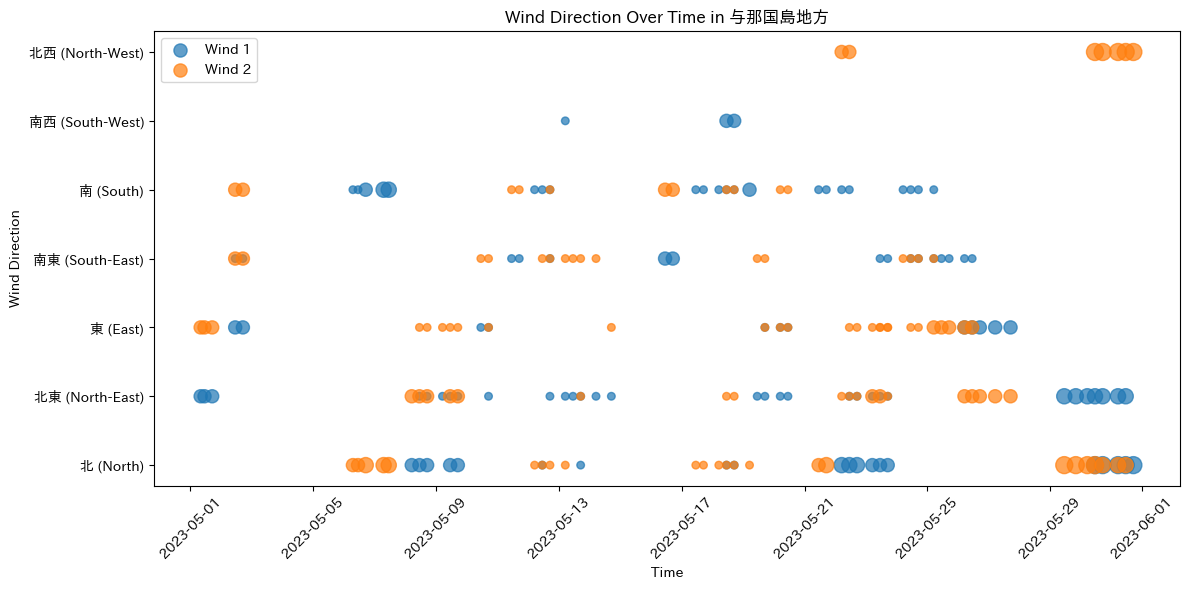

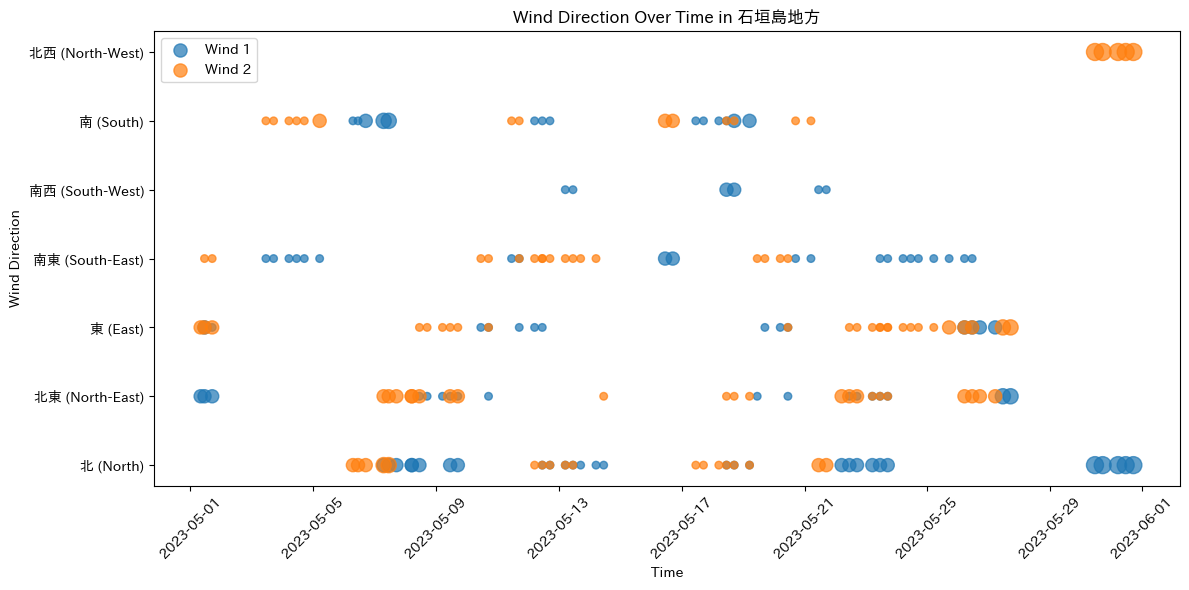

In [110]:
for name, group in valid_wind.groupby('areaName'):
    scaling_factor = 30  # adjusting dot size

    # Apply the bilingual_label function to create new columns
    group['wind_1_direction_bilingual'] = group['wind_1_direction'].apply(bilingual_label)
    group['wind_2_direction_bilingual'] = group['wind_2_direction'].apply(bilingual_label)

    plt.figure(figsize=(12, 6))
    plt.scatter(group['reportDatetime'], group['wind_1_direction_bilingual'],  # Use bilingual column
                s=group['wind_1_intensity'] * scaling_factor,
                plotnonfinite=False, label='Wind 1', alpha=0.7)
    plt.scatter(group['reportDatetime'], group['wind_2_direction_bilingual'],  # Use bilingual column
                s=group['wind_2_intensity'] * scaling_factor,
                plotnonfinite=False, label='Wind 2', alpha=0.7)

    plt.xlabel('Time')
    plt.ylabel('Wind Direction')
    plt.title(f'Wind Direction Over Time in {name}')  # Title specific to areaName
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualization of temperature data

In [111]:
# filtering out areaNames where we have at least some data of feature 'wind'
temp_areas = missing_percentage[missing_percentage['temp'] != 100].index

# preparing a new DataFrame used further in this section
temp_pd = pd.DataFrame(data[data['areaName'].isin(temp_areas)][['reportDatetime','areaName', 'temp', 'tempMinUpper', 'tempMaxUpper', 'tempMinLower', 'tempMaxLower']])
temp_pd['reportDatetime'] = pd.to_datetime(temp_pd['reportDatetime'])

In [112]:
temp_pd
# currently, the trimmed database looks as follows:

,reportDatetime,areaName,temp,tempMinUpper,tempMaxUpper,tempMinLower,tempMaxLower
16,2023-05-31 17:00:00+09:00,石垣島,25.0,NaN,NaN,NaN,NaN
17,2023-05-31 17:00:00+09:00,石垣島,28.0,NaN,NaN,NaN,NaN
18,2023-05-31 17:00:00+09:00,与那国島,25.0,NaN,NaN,NaN,NaN
19,2023-05-31 17:00:00+09:00,与那国島,27.0,NaN,NaN,NaN,NaN
27,2023-05-31 17:00:00+09:00,石垣島,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3529,2023-04-30 17:00:00+09:00,石垣島,NaN,26.0,30.0,23.0,27.0
3530,2023-04-30 17:00:00+09:00,石垣島,NaN,27.0,31.0,24.0,27.0
3531,2023-04-30 17:00:00+09:00,石垣島,NaN,27.0,31.0,24.0,28.0
3532,2023-04-30 17:00:00+09:00,石垣島,NaN,27.0,31.0,24.0,28.0


In [113]:
# calculating mean value of temperate
temp_pd['avg_temp'] = temp_pd[['temp', 'tempMinUpper', 'tempMaxUpper', 'tempMinLower', 'tempMaxLower']].mean(axis=1)

In [114]:
temp_pd['avg_temp'].isnull().sum()

93

There are 93 rows with missing average temperature values. We will use a technique called K-Nearest Neighbors Imputation to fill these blanks in using an educated guess based on the temperatures of similar data points. It looks at the 10 most similar data points and uses their average temperature to estimate the missing value. This helps in having a complete dataset for further visualization.

In [115]:
imputer = KNNImputer(n_neighbors=10) # You might need to tune n_neighbors
temp_pd['avg_temp'] = imputer.fit_transform(temp_pd[['avg_temp']])[:,0]

In [116]:
temp_pd['avg_temp'].isnull().sum()

0

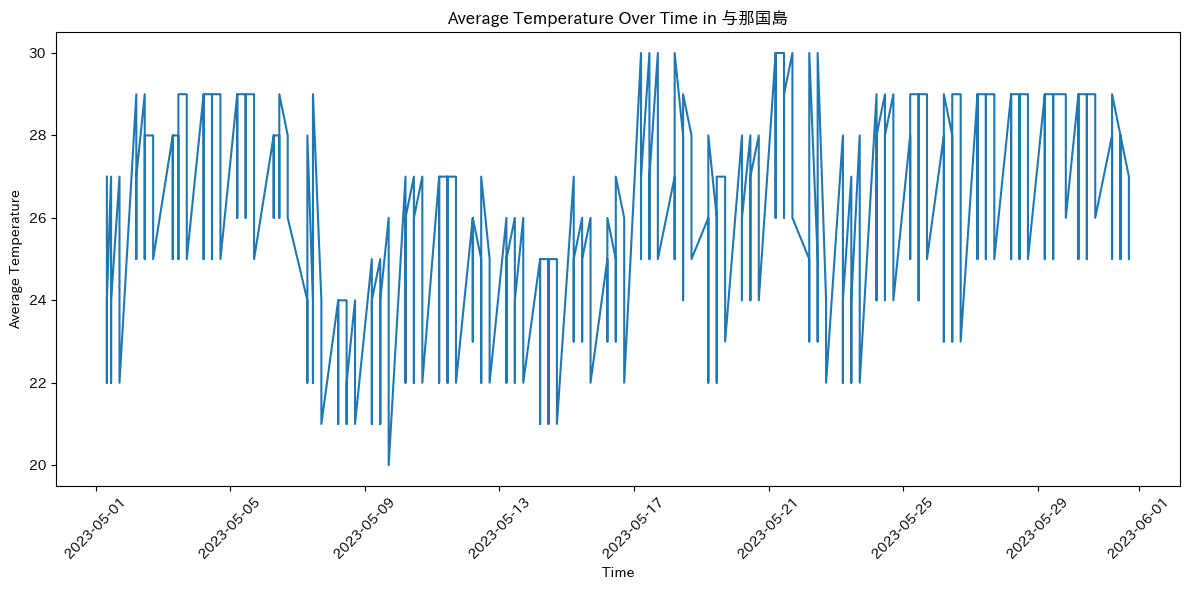

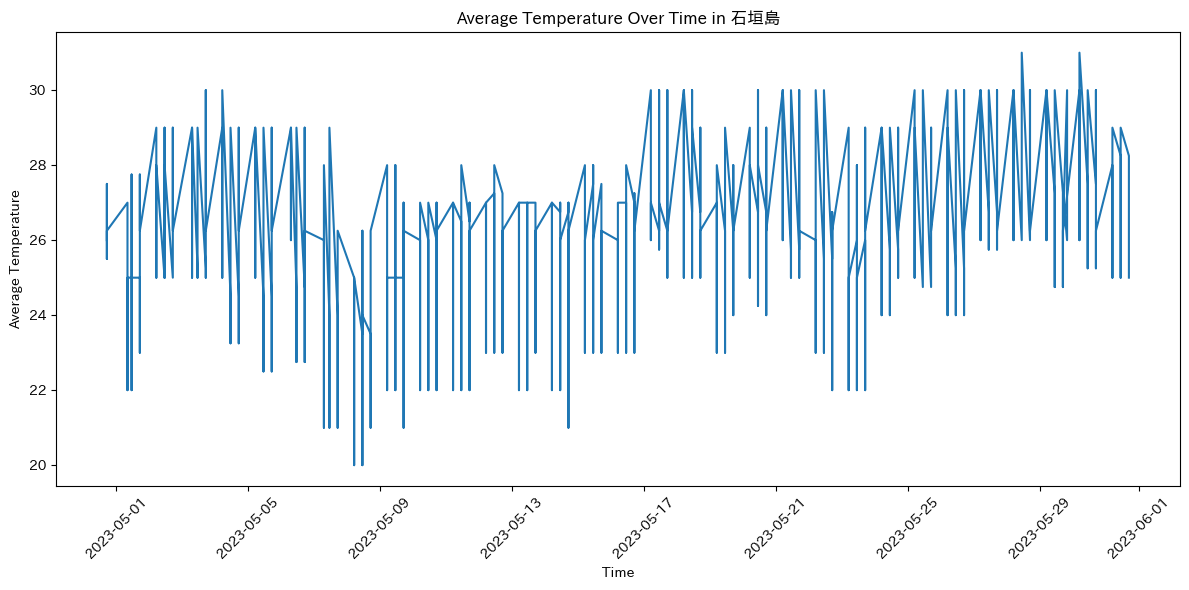

In [117]:
for name, group in temp_pd.groupby('areaName'):
  plt.figure(figsize=(12, 6))
  plt.plot(group['reportDatetime'], group['avg_temp'])
  plt.xlabel('Time')
  plt.ylabel('Average Temperature')
  plt.title(f'Average Temperature Over Time in {name}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

To enhance the next visualization, let's create following function to categorize time into four periods based on the hour:

* Morning: 6 to 11
* Noon: 12 to 17
* Evening: 18 to 23
* Night: 0 to 5

In [118]:
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Noon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

In [119]:
temp_pd['hour'] = temp_pd['reportDatetime'].dt.hour
temp_pd['time_category'] = temp_pd['hour'].apply(categorize_time)

Now, let's create a scatter plot showing how the average temperature varies over time for each location in the dataset. Thanks to the above function, it can be broken down by different parts of the day (morning, noon, evening, night). The color-coding helps to visually distinguish between morning, noon, evening, and night temperatures.

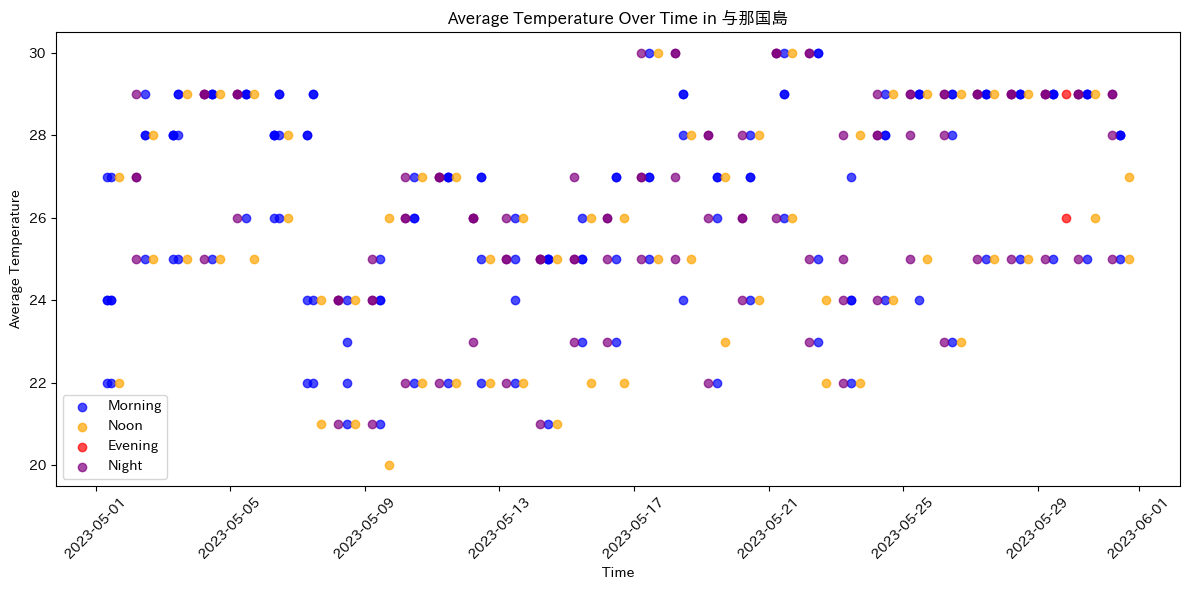

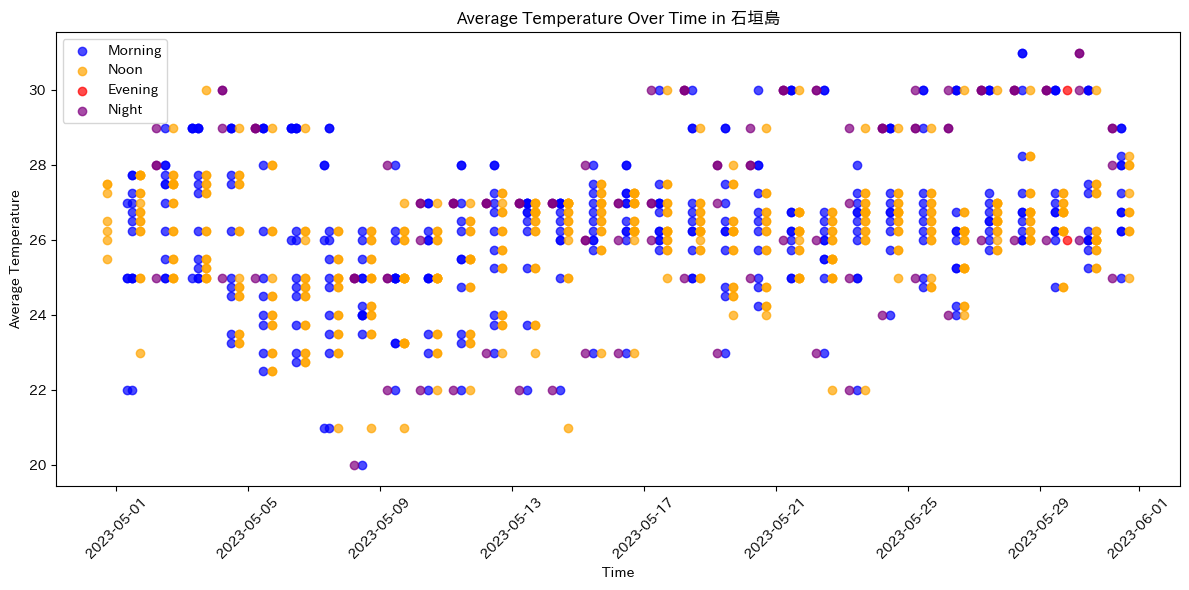

In [120]:
for name, group in temp_pd.groupby('areaName'):

  daypart_colors = {'Morning': 'blue', 'Noon': 'orange', 'Evening': 'red', 'Night': 'purple'}
  plt.figure(figsize=(12, 6))

  for daypart, color in daypart_colors.items():
    subset = group[group['time_category'] == daypart]
    plt.scatter(subset['reportDatetime'], subset['avg_temp'], label=daypart, color=color, alpha = 0.7)

  plt.xlabel('Time')
  plt.ylabel('Average Temperature')
  plt.title(f'Average Temperature Over Time in {name}')
  plt.xticks(rotation=45)
  plt.legend()
  plt.tight_layout()
  plt.show()


# Visualization of weather

In [121]:
# filtering out areaNames where we have at least some data of feature 'wind'
weather_areas = missing_percentage[missing_percentage['weather'] != 100].index
weather_pd = pd.DataFrame(data[data['areaName'].isin(weather_areas)][['reportDatetime','areaName', 'weather']])
weather_pd['reportDatetime'] = pd.to_datetime(weather_pd['reportDatetime'])

In [122]:
weather_pd
# currently, the trimmed database looks as follows:

,reportDatetime,areaName,weather
0,2023-05-31 17:00:00+09:00,石垣島地方,雨 所により 雷 を伴う
1,2023-05-31 17:00:00+09:00,石垣島地方,雨 夜 くもり 所により 昼前 まで 雷を伴い 激しく 降る
2,2023-05-31 17:00:00+09:00,石垣島地方,くもり
3,2023-05-31 17:00:00+09:00,与那国島地方,雨 所により 雷 を伴う
4,2023-05-31 17:00:00+09:00,与那国島地方,雨 夜 くもり 所により 夕方 まで 雷 を伴う
...,...,...,...
3507,2023-05-01 08:00:00+09:00,与那国島地方,NaN
3508,2023-05-01 08:00:00+09:00,与那国島地方,NaN
3509,2023-05-01 08:00:00+09:00,与那国島地方,NaN
3510,2023-05-01 08:00:00+09:00,与那国島地方,NaN


In the previous visualizations, I attempted to remove the separator '\u3000'. However, this time, it will help us distinguish between different weather descriptions reported throughout the day by the weather station. The "weather" column contains individual weather conditions (such as sunny, cloudy, rainy), and we'll extract this information into a dictionary to track how often each condition occurs in the dataset. This data will be stored in the weather_freq, where the keys represent the weather conditions and the values indicate their frequencies.

In [123]:
from collections import defaultdict

weather_freq = defaultdict(int)
for weather_str in weather_pd['weather']:
    if isinstance(weather_str, str):  # Check if the value is a string
        for sub_str in weather_str.split('\u3000'):
            weather_freq[sub_str] += 1

In addition to occasional descriptive terms related to the time of day, the following keywords are important for depicting the frequencies of various weather types. Some expressions refer to the same type of weather, so expressions like "heavy rain" and "rain" will be grouped under one category.

* 晴れ (hare) – sunny
* くもり (kumori) – cloudy
* 雨 (ame) – rain
* 激しく降る (hageshiku furu) – heavy rain
* 雷 (kaminari) – thunder
* 雷を伴う (kaminari o tomonau) – accompanied by thunder
* 雷を伴い (kaminari o tomoni) – with thunder

In [124]:
weather_freq['雨'] += weather_freq['降る']
del weather_freq['降る']

In [125]:
weather_freq['雷'] += weather_freq['雷を伴う'] + weather_freq['雷を伴い']
del weather_freq['雷を伴う']
del weather_freq['雷を伴い']

In [126]:
valid_weather = ['晴れ', 'くもり', '雨', '雷']

Now we can create a simple pie chart to visualize the frequency of different weather conditions.

In [127]:
# filtering weather frequencies for valid weather conditions
weather_freq = {key: value for key, value in weather_freq.items() if key in valid_weather}

In [128]:
weather_translations = {
    '晴れ': 'Sunny',
    'くもり': 'Cloudy',
    '雨': 'Rain',
    '雷': 'Thunder'
}

# labels with translations for pie chart
labels_with_translations = [f"{weather_translations.get(key, key)} ({key})" for key in weather_freq.keys()]


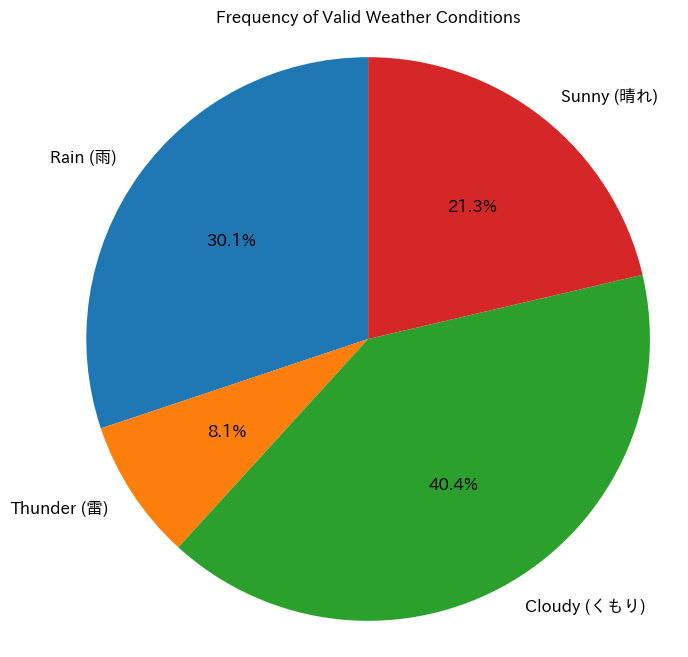

In [129]:
plt.figure(figsize=(8, 8))
plt.pie(weather_freq.values(), labels=labels_with_translations,  # Use translated labels
        autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 12})

plt.title('Frequency of Valid Weather Conditions')
plt.axis('equal')
plt.show()